# Linear Regression Practice

For this morning's practice, we'll be revisiting the Boston dataset to create a linear regression model that models the `MEDV` - Median value of owner-occupied homes in $1000's.

The only requirement is that the linear regression model is statistically valid such that any interpretation of coefficients are valid

* Features must not violate the assumptions of a linear regression (multicollinearity, linear with respect to the outcome variable, errors are normally distributed, etc.)

* Try to maximize R<sup>2</sup> _without breaking any assumptions_

Feel free to use either `sklearn` or `statsmodels` to generate the model.

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [17]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [46]:
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['MEDV'] = boston['target']

In [44]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


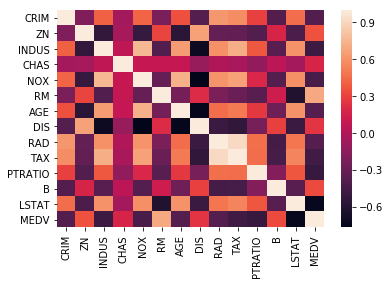

In [47]:
sns.heatmap(data = boston_df.corr());

In [57]:
boston_df.corr()['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [85]:
predictors = boston_df.iloc[:, 0:13]
target = boston_df['MEDV']

In [62]:
model = sm.OLS(target, sm.add_constant(predictors)).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        10:24:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#High condition number which may suggest multicollinearity or number problems. Let's scale the predictors using
#mean normalization.

predictors_scaled = (predictors - np.mean(predictors)) / np.std(predictors)

In [73]:
model2 = sm.OLS(target, sm.add_constant(predictors_scaled)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        10:46:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Let's remove the two variables with non-significant P-values
del predictors_scaled['INDUS']
del predictors_scaled['AGE']

In [75]:
model3 = sm.OLS(target, sm.add_constant(predictors_scaled)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          5.54e-137
Time:                        10:47:55   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    107.018      0.000      22.119      22.946
CRIM          -0.9316      0.282     -3.307      0.001      -1.485      -0.378
ZN             1.0682      0.315      3.390      0.001       0.449       1.687
CHAS           0.6899      0.217      3.183      0.002       0.264       1.116
NOX           -2.0115      0.409     -4.915      0.000      -2.816      -1.207
RM             2.6684      0.285      9.356      0.000       2.108       3.229
DIS           -3.1401      0.391     -8.037      0.000      -3.908      -2.372
RAD            2.6062      0.552      4.726      0.000       1.523       3.690
TAX           -1.9831      0.568     -3.493      0.001      -3.099      -0.867
PTRATIO       -2.0471      0.279     -7.334      0.000      -2.596      -1.499
B              0.8474      0.244      3.475      0.001       0.368       1.327
LSTAT         -3.7279      0.338    -11.019      0.000      -4.393      -3.063
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#This is ok, but maybe I want to try using sklearn to do recursive feature selection, 
#and then come back to statsmodels to better evaluate the selected model.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

In [79]:
ss = StandardScaler()

ss.fit(predictors)
predictors_skscaled = ss.transform(predictors)

In [80]:
lr = LinearRegression()
lr.fit(predictors_skscaled, target)
print(lr.coef_)
print(lr.intercept_)

[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]
22.532806324110677


In [81]:
metrics.r2_score(target, lr.predict(predictors_skscaled))

0.7406426641094095

In [107]:
def recursive_feature_selection(predictors, target):
    """Uses sklearn to select a set of features that maximizes the R-Squared Value of a linear
    regression or multiple regression model. Also performs mean normalization and log
    transformation."""
    ss = StandardScaler()
    lr_rfe = LinearRegression()
    n_features = len(predictors)
    best_R_sq = 0
    ss.fit(predictors)
    scaled_predictors = pd.DataFrame(ss.transform(predictors), columns = predictors.columns)
    best_features = []
    while n_features > 1:
        select = RFE(lr_rfe, n_features_to_select= (n_features - 1))
        select = select.fit(X = scaled_predictors, y = target)
        selected_columns = scaled_predictors[scaled_predictors.columns[select.support_]]
        lr_rfe.fit(selected_columns, target)
        R_sq = metrics.r2_score(target, lr_rfe.predict(selected_columns))
        n_features -= 1
        if R_sq >= best_R_sq:
            best_R_sq = R_sq
            best_features = selected_columns
        else:
            next
    model = sm.OLS(target, sm.add_constant(best_features)).fit()
    return model.summary()

In [108]:
recursive_feature_selection(predictors, target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        12:52:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#It looks like the best linear regression model (judged by R-squared values) includes all of
#the variables. Ideally, I would alter the function for recursive feature selection to also
#take into account adjusted R-squared values or AIC/BIC values, which would penalize more
#variables that don't add to the model. 